#**Hands-on Activity 9.2 Customized Visualizations using Seaborn**

##**CPE311 - Computational Thinking with Python**

Name: Dela Cruz, Gabrielle

Section: CPE22S3

Performed on: 07/08/2024

Submitted on: 07/xx/2024

Submitted to: Engr. Roman M. Richard

Link to Colab: https://colab.research.google.com/drive/1i9Y6uX1DtOYkGlbOPTyVyA2yK7IbFx4m?usp=sharing






###**Instructions:**
- Create a Python notebook to answer all shown procedures, exercises and analysis in this section.

###**Resources:**
- Download the following datasets: fb_stock_prices_2018.csv, earthquakes-1.csv

###**Procedures:**
- 9.4 Introduction to Seaborn
- 9.5 Formatting Plots
- 9.6 Customizing Visualizations

###**Data Analysis:**
- Provide comments on output from the procedures.

###**Supplementary Activity:**
Using the CSV files provided and what we have learned so far in this module complete the following exercises:
1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.
2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)
3. Fill in the area between the bounds in the plot from exercise #2.
4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.
5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
- Disappointing user growth announced after close on July 25, 2018
- Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
- FTC launches investigation on March 20, 2018
6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.




In [4]:
# Code setup for data visualization of the datasets.
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fb = pd.read_csv('/content/drive/MyDrive/Dataset Uploads/fb_stock_prices_2018(1).csv', index_col='date', parse_dates=True)
quakes = pd.read_csv('/content/drive/MyDrive/Dataset Uploads/earthquakes-1.csv')

<Axes: >

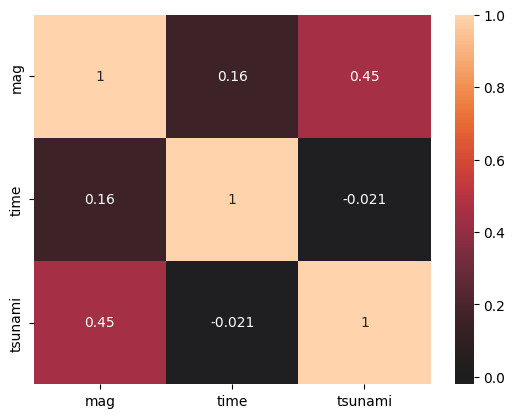

In [8]:
# Creating a heatmap to visualize the correlation between earthquake magnitude and tsunami with mb as magType.
quakesMb = quakes.query('magType == "mb"')
numeric_columns = quakesMb.select_dtypes(include=['number'])
sns.heatmap(numeric_columns.corr(), annot=True, center=0)

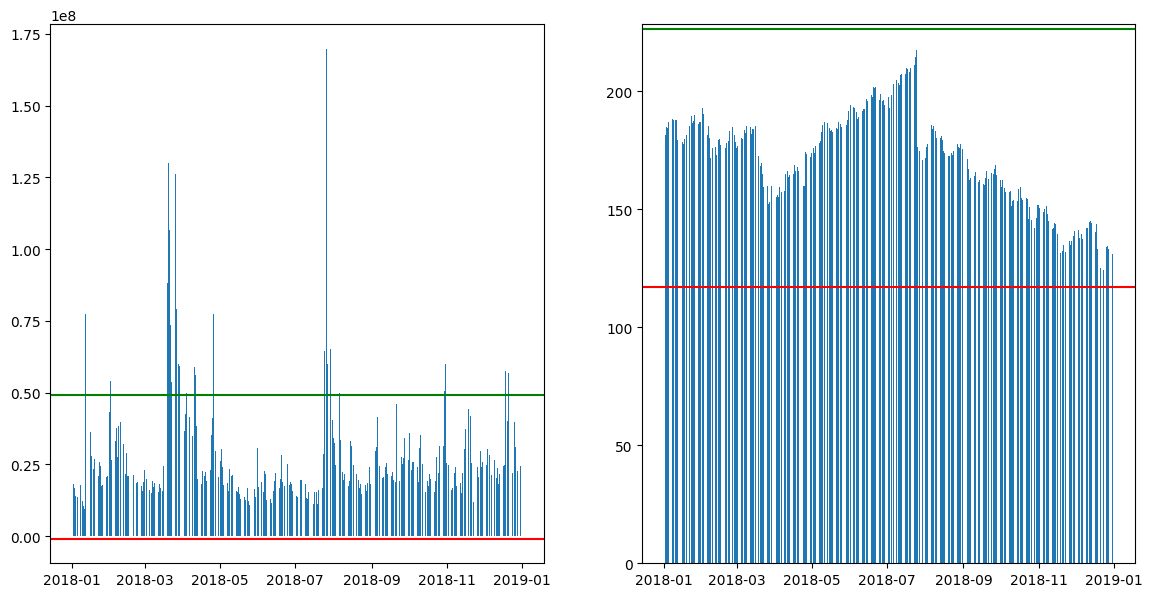

In [10]:
# Creating a box plot of Facebook volume traded and closing prices.
iqrVolume = fb['volume'].quantile(0.75) - fb['volume'].quantile(0.25)
iqrClose = fb['close'].quantile(0.75) - fb['close'].quantile(0.25)

tukeyLowerVolume = fb['volume'].quantile(0.25) - 1.5 * iqrVolume
tukeyUpperVolume = fb['volume'].quantile(0.75) + 1.5 * iqrVolume
tukeyLowerClose = fb['close'].quantile(0.25) - 1.5 * iqrClose
tukeyUpperClose = fb['close'].quantile(0.75) + 1.5 * iqrClose

fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].bar(fb.index, fb.volume)
ax[0].axhline(tukeyLowerVolume, color='r')
ax[0].axhline(tukeyUpperVolume, color='g')

ax[1].bar(fb.index, fb.close)
ax[1].axhline(tukeyLowerClose, color='r')
ax[1].axhline(tukeyUpperClose, color='g')

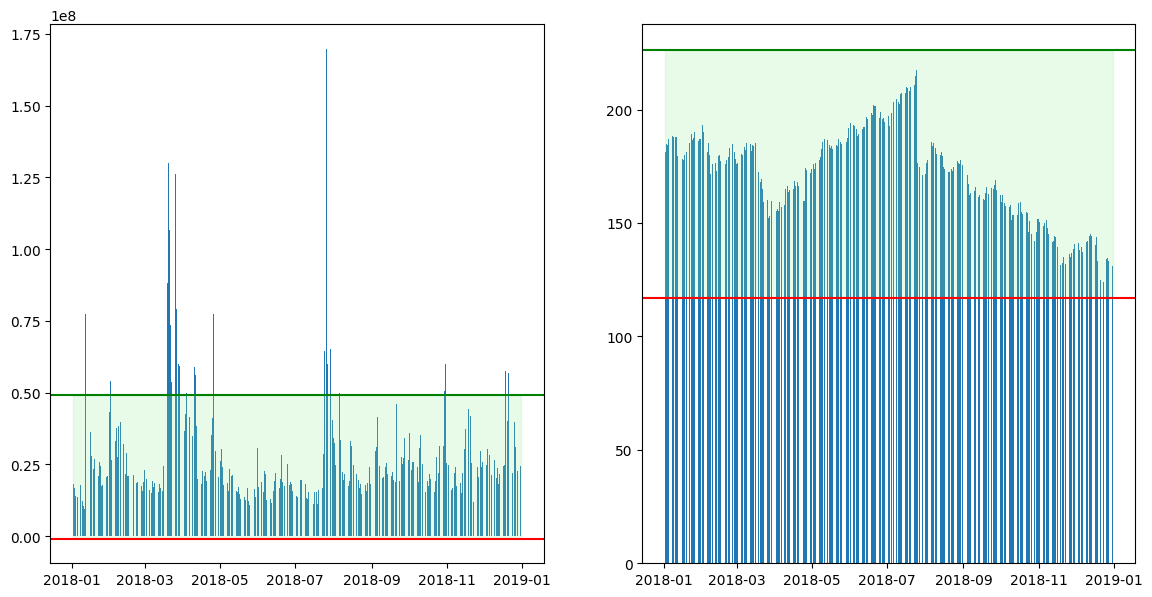

In [14]:
# Filling the area of the bounds of the above graph.
# Creating a box plot of Facebook volume traded and closing prices.
iqrVolume = fb['volume'].quantile(0.75) - fb['volume'].quantile(0.25)
iqrClose = fb['close'].quantile(0.75) - fb['close'].quantile(0.25)

tukeyLowerVolume = fb['volume'].quantile(0.25) - 1.5 * iqrVolume
tukeyUpperVolume = fb['volume'].quantile(0.75) + 1.5 * iqrVolume
tukeyLowerClose = fb['close'].quantile(0.25) - 1.5 * iqrClose
tukeyUpperClose = fb['close'].quantile(0.75) + 1.5 * iqrClose

fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].bar(fb.index, fb.volume)
ax[0].axhline(tukeyLowerVolume, color='r')
ax[0].axhline(tukeyUpperVolume, color='g')
ax[0].fill_between(fb.index, tukeyLowerVolume, tukeyUpperVolume, color='lightgreen', alpha=0.2)

ax[1].bar(fb.index, fb.close)
ax[1].axhline(tukeyLowerClose, color='r')
ax[1].axhline(tukeyUpperClose, color='g')
ax[1].fill_between(fb.index, tukeyLowerClose, tukeyUpperClose, color='lightgreen', alpha=0.2)

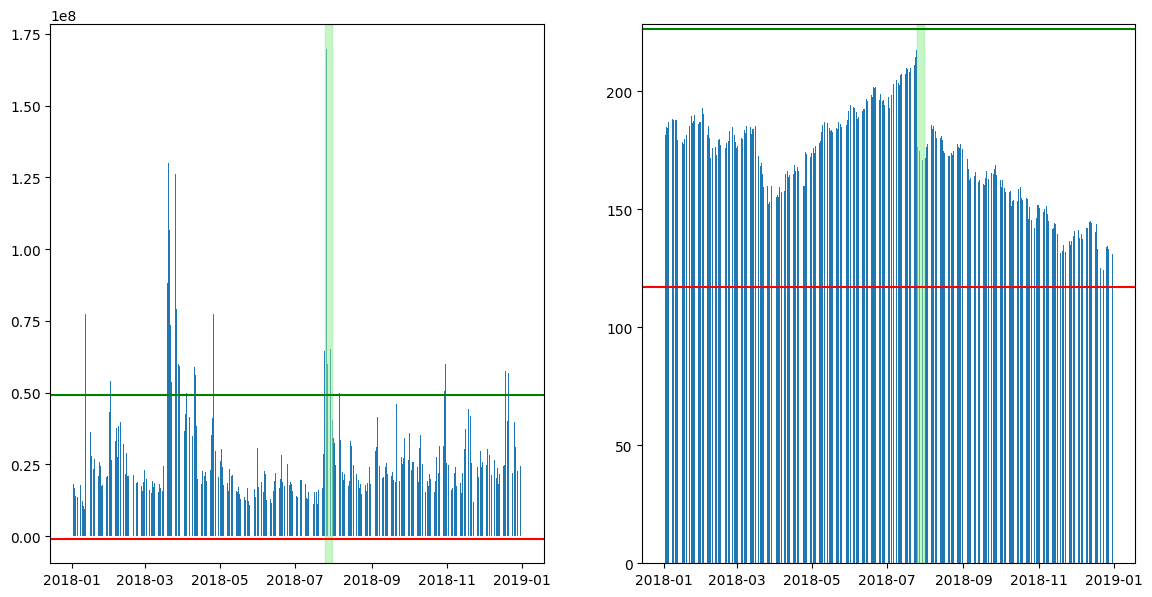

In [16]:
# Using avxspan() to shade a rectangle which marks the decline of Facebook price.
iqrVolume = fb['volume'].quantile(0.75) - fb['volume'].quantile(0.25)
iqrClose = fb['close'].quantile(0.75) - fb['close'].quantile(0.25)

tukeyLowerVolume = fb['volume'].quantile(0.25) - 1.5 * iqrVolume
tukeyUpperVolume = fb['volume'].quantile(0.75) + 1.5 * iqrVolume
tukeyLowerClose = fb['close'].quantile(0.25) - 1.5 * iqrClose
tukeyUpperClose = fb['close'].quantile(0.75) + 1.5 * iqrClose

fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].bar(fb.index, fb.volume)
ax[0].axhline(tukeyLowerVolume, color='r')
ax[0].axhline(tukeyUpperVolume, color='g')
ax[0].axvspan('2018-07-25', '2018-07-31', color='lightgreen', alpha=0.5)

ax[1].bar(fb.index, fb.close)
ax[1].axhline(tukeyLowerClose, color='r')
ax[1].axhline(tukeyUpperClose, color='g')
ax[1].axvspan('2018-07-25', '2018-07-31', color='lightgreen', alpha=0.5)

Text(17610.0, 168.15, 'FTC launches investigation')

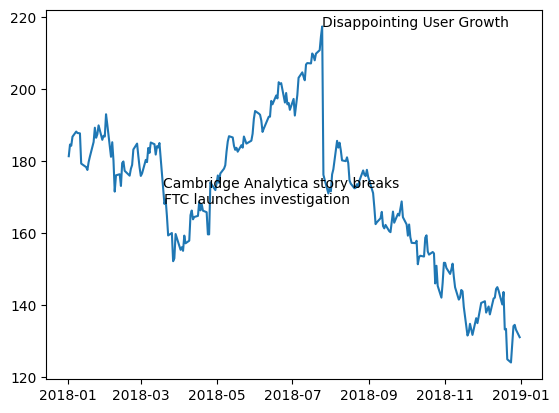

In [19]:
# Using the Facebook Stock Price dataset for annotating significant events.
import matplotlib.dates as plt_date

plt.plot(fb.close)
plt.annotate('Disappointing User Growth', xy=(plt_date.date2num(pd.to_datetime('2018-07-25')), fb.loc['2018-07-25', 'close']))
plt.annotate('Cambridge Analytica story breaks', xy=(plt_date.date2num(pd.to_datetime('2018-03-19')), fb.loc['2018-03-19', 'close']))
plt.annotate('FTC launches investigation', xy=(plt_date.date2num(pd.to_datetime('2018-03-20')), fb.loc['2018-03-20', 'close']))

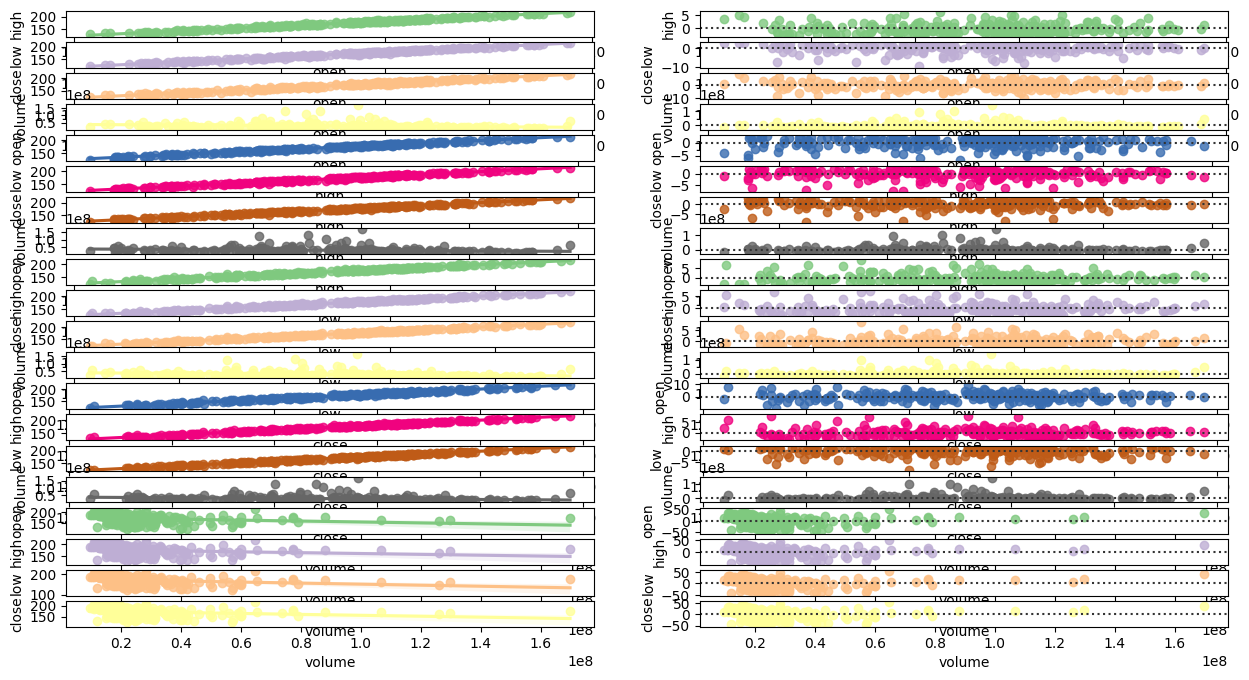

In [23]:
# Modifying the reg_red_plots() function instead of cycling between two colors.
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

def reg_resid_plots(data):
  num_cols = data.shape[1]
  permutation_count = num_cols*(num_cols - 1)
  fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))
  colormap = plt.colormaps['Accent']

  for i, (x,y), axes in zip(range(permutation_count), itertools.permutations(data.columns, 2), ax):
    color = colormap(i%colormap.N)
    for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
      func(data=data, x=x, y=y, color=color, ax=subplot)

  plt.close()
  return fig

reg_resid_plots(fb)

###**Summary/Conclusion:**
It is imperative that data must be visualized in order to make better annotations/interpretations for further development. With this, we can implement pandas and matplotlib, but Seaborn is also another option that seems vivid in the display of data. However, when executing code cells, I find it noticeably slower as compared to pandas or matplotlib. Overall, any of the methodology that can be used to visualize the data is important in the applications of Data Science.